In [12]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

In [13]:
class Signal(object):
    
    def __init__(self, rate, samples):
        self.rate = rate
        self.samples = samples
        
    def plot(self):
        cycle = 1/float(self.rate)
        duration = (len(self.samples)-1)*cycle
        
        x = np.linspace(0,duration,len(self.samples))
        
        plt.subplot(121)
        plt.plot(x, self.samples)
        plt.title("Wave Amplitutde")
        plt.xlabel("Seconds")
        #plt.gca().set_aspect("equal")
        #plt.show()
        
        plt.subplot(122)
        y = np.real(np.fft.fft(self.samples))
        plt.plot(y)
        #plt.gca().set_aspect("equal")
        plt.title("Fourier Coefficients")
        
        plt.tight_layout()
        plt.show()
        
    def export(self, filename):
        samp = np.real(self.samples)
        scale = 32767./max(np.abs(samp))
        if scale < 50:
            scale = 1
        data = scale*samp
        wavfile.write(filename+'.wav', self.rate, data.astype(np.int16))
        
    def __add__(self, other):
        s, o = self.samples, other.samples
        length = min(len(s), len(o))
        s = s[:length]
        o = o[:length]
        return Signal(self.rate, s + o)
    
    def __mult__(self, a):
        return Signal(self.rate, self.samples*a)
    
    def __div__(self, a):
        return Signal(self.rate, self.samples/a)

    def play(self):
        self.export('play')

def combine(notes, length = 1.):
    rate = 44100
    
    ar_length = int(rate*length)
    symphony = Signal(rate, np.hstack([x.samples[:ar_length] for x in notes]))
    return symphony

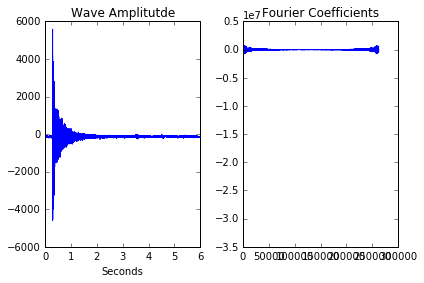

In [14]:
samplerate = 44100

rate, balloon = wavfile.read('balloon.wav')
balloon = Signal(rate, balloon[:-47855])
rate, chopin = wavfile.read('chopin.wav')
chopin = Signal(rate, chopin)
rate, chopin_full = wavfile.read('chopin_full.wav')
chopin_full = Signal(rate, chopin_full)
rate, NoisySignal1 = wavfile.read('NoisySignal1.wav')
NoisySignal1 = Signal(rate, NoisySignal1)
rate, NoisySignal2 = wavfile.read('NoisySignal2.wav')
NoisySignal2 = Signal(rate, NoisySignal2)
rate, pianoclip = wavfile.read('pianoclip.wav')
pianoclip = Signal(rate, pianoclip)
rate, pulseramp = wavfile.read('pulseramp.wav')
pulseramp = Signal(rate, pulseramp)
rate, saw = wavfile.read('saw.wav')
saw = Signal(rate, saw)
rate, tada_conv = wavfile.read('tada-conv.wav')
tada_conv = Signal(rate, tada_conv)
rate, tada = wavfile.read('tada.wav')
tada = Signal(rate, tada)

balloon.plot()

## Problem 1

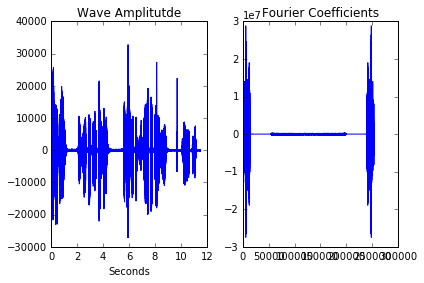

So first of all, let me assert my firm belief that the only thing we have to fear is fear itself. - FDR


In [15]:
rate,data = wavfile.read("NoisySignal2.wav")

fsig = np.fft.fft(data)
for i in range(14000,55000):
    fsig[i] = 0
    fsig[-i] = 0

#fsig *= fsig
newsig = np.fft.ifft(fsig)
newsig = sp.real(newsig)
newsig = sp.int16(newsig / sp.absolute(newsig).max() * 32767)

Noise = Signal(rate, newsig)
Noise.plot()
Noise.play()

print "So first of all, let me assert my firm belief that the only thing we have to fear is fear itself. - FDR"
IPython.display.Audio("play.wav")

## Problem 2

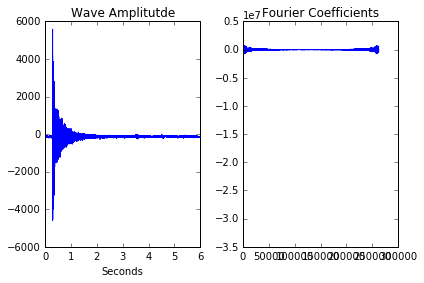

In [16]:
data = balloon.samples

balloon_fourier = np.fft.fft(data)/10**6
balloon.plot()

## Problem 3

573300 262144


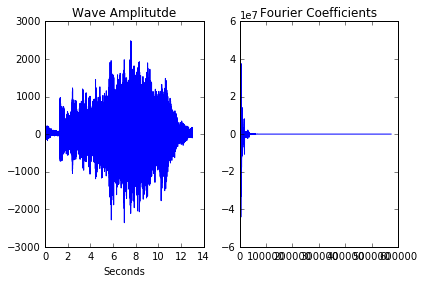

In [20]:
def hadamard(a, b):
    len_a = len(a)
    len_b = len(b)
    print len_a, len_b
    zeros = np.zeros(abs(len_a-len_b))
    if len_a < len_b:
        return b*np.hstack([a[:len_a/2], zeros, a[len_a/2:]])
    else:
        return a*np.hstack([b[:len_a/2], zeros, b[len_a/2:]])

data = np.hstack([chopin.samples,np.zeros(3*samplerate)])
chopin_fourier = np.fft.fft(data)

#plt.plot(chopin_fourier)
#plt.show()
#plt.plot(balloon_fourier)
#plt.show()

temp = hadamard(chopin_fourier,balloon_fourier)
temp[abs(temp)>100000000] = 0
temp *= 3
chopin_convolve = np.fft.ifft(temp)
chopin_c = Signal(samplerate, chopin_convolve)
chopin_c.play()
chopin_c.plot()
IPython.display.Audio("play.wav")

## Problem 4

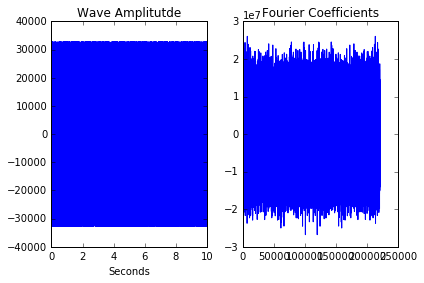

In [18]:
newrate = 22050
noise = sp.int16(sp.random.randint(-32767, 32767, newrate * 10))
noise = Signal(newrate,noise)
noise.play()
noise.plot()
IPython.display.Audio("play.wav")

42752 220500


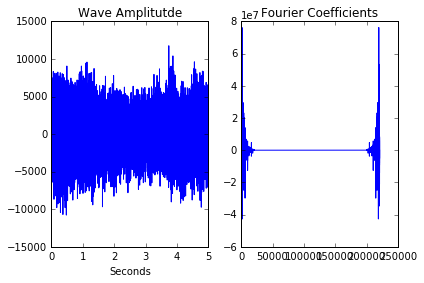

In [19]:
tada_fourier = np.fft.fft(tada.samples)
noise_fourier = np.fft.fft(noise.samples)/10**6
temp = hadamard(tada_fourier, noise_fourier)
temp = np.fft.ifft(temp)
new_tada = Signal(44100, temp)
new_tada.plot()
new_tada.play()
IPython.display.Audio('play.wav')